In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

pot1 = pd.read_csv("data/potholes_1.csv")
pot2 = pd.read_csv("data/potholes_2.csv")
potholes = pd.concat([pot1, pot2])
census_data = pd.read_csv('data/chicago_census_data.csv')

In [2]:
pothole_counts = potholes.groupby('Community Area').size()

In [3]:
counts_by_income = pd.DataFrame(census_data. iloc[:, [0,7]])

In [4]:
counts_by_income.columns.values[0] = "Community Area"

In [5]:
counts_by_income.columns.values[1] = "Per Capita Income"

In [6]:
counts_by_income.loc[:,'Potholes'] = pothole_counts

In [7]:
print(counts_by_income)

    Community Area  Per Capita Income  Potholes
0              1.0              23939      1566
1              2.0              23040      9971
2              3.0              35787     15462
3              4.0              37524      5463
4              5.0              57123      7081
..             ...                ...       ...
73            74.0              34381      7647
74            75.0              27149      5106
75            76.0              25828      6719
76            77.0              33385      2320
77             NaN              28202      9001

[78 rows x 3 columns]


In [8]:
counts_by_income.sort_values(by='Potholes', ascending=False, inplace=True)

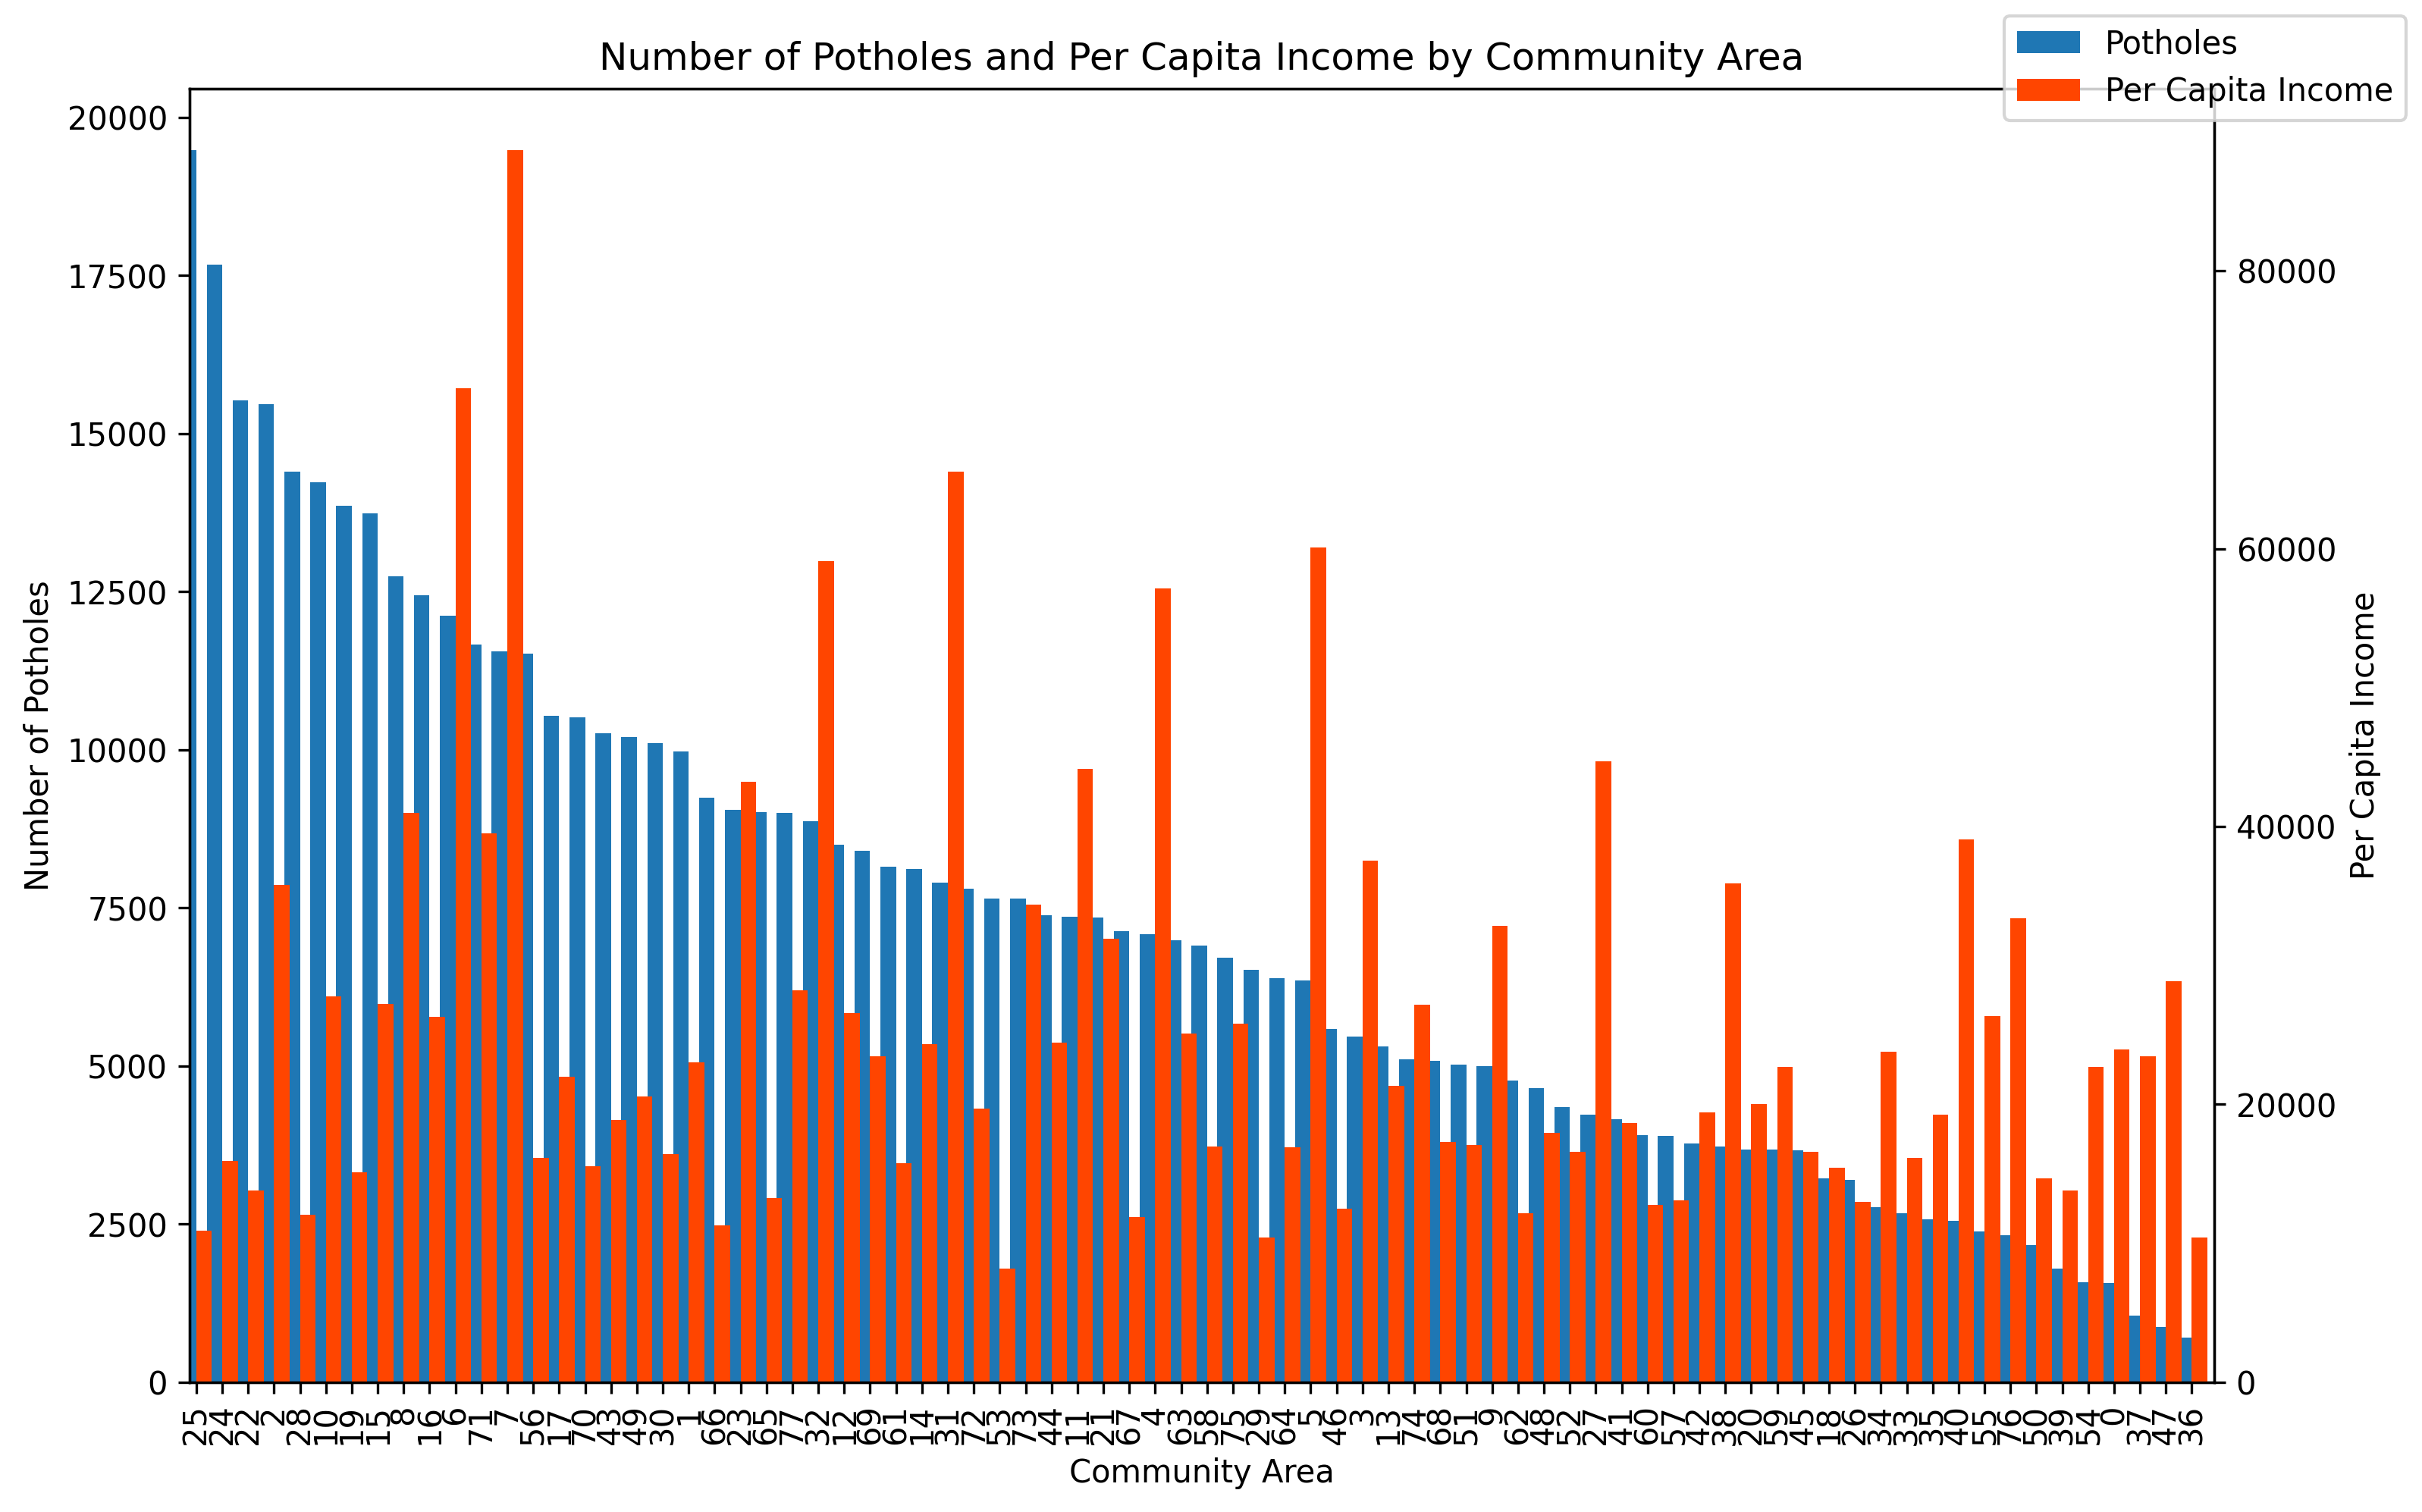

In [9]:
fig = plt.figure(figsize=(16 / 1.5, 10 / 1.5), dpi=300)

ax = fig.add_subplot(111)  
ax2 = ax.twinx()  

#ax.axes.xaxis.set_visible(False)

width = 0.6

counts_by_income[("Potholes")].plot(
    kind="bar", ax=ax, width=width, position=1, label="Potholes"
)
counts_by_income[("Per Capita Income")].plot(
    kind="bar", color="orangered", ax=ax2, width=width, position=0, label="Per Capita Income"
)

ax.set_title("Number of Potholes and Per Capita Income by Community Area")
ax.set_ylabel("Number of Potholes")
ax2.set_ylabel("Per Capita Income")
ax.set_xlabel("Community Area")

fig.legend()

fig.tight_layout()

plt.show()